#What is Time Series Forecasting?

Time series forecasting is like trying to predict the future based on what happened in the past. Imagine you're trying to guess how many ice creams you'll sell next month based on your sales over the past year.

#What is FB Prophet?

FB Prophet is a tool made by Facebook to help make these predictions. It's designed to be easy to use and works well even if your data has ups and downs or missing pieces.

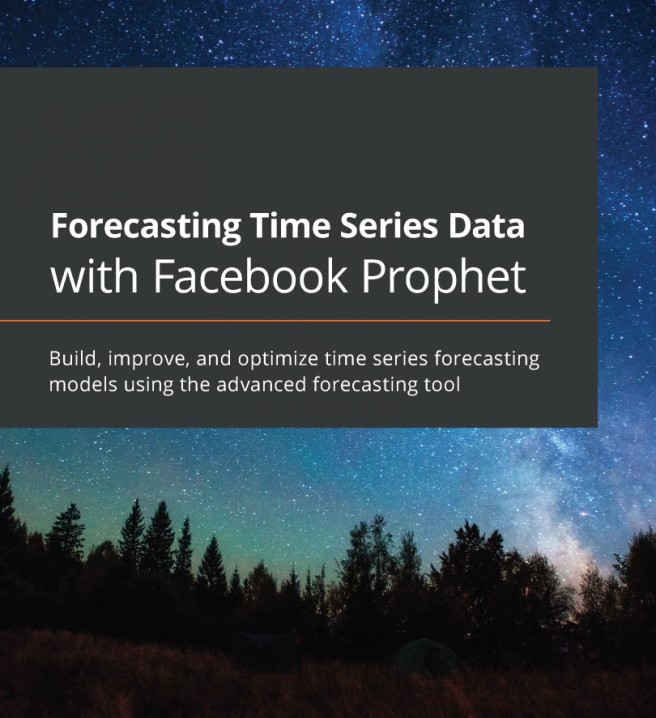

In [28]:
from IPython.display import Image
Image('/content/cover_image_large.jpg', width=850)

In [1]:
pip install prophet

In [8]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [9]:
df = pd.read_csv('/content/MaunaLoaDailyTemps.csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [11]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [12]:
df=df[["DATE","AvgTemp"]]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


Change column name for FB Prophet

In [13]:
df.columns =['ds','y']

In [14]:
df['ds']=pd.to_datetime(df['ds'])
df.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


Data Plotting

<Axes: xlabel='ds'>

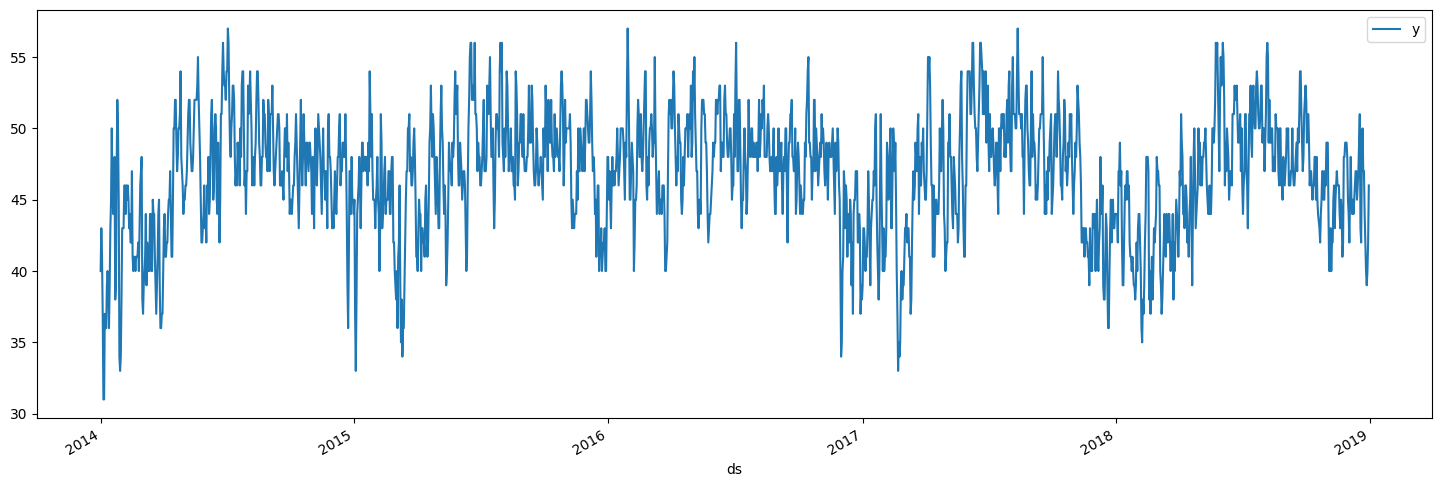

In [15]:
df.plot(x='ds',y='y',figsize=(18,6))

In [16]:
len(df)

1821

##Train,Test Split




In [17]:
train = df.iloc[: len(df)-365]
test = df.iloc[len(df)-365:]

##Making Predictions

In [18]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) # MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgtya2r_6/88lzlrnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgtya2r_6/3mwr287u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4678', 'data', 'file=/tmp/tmpgtya2r_6/88lzlrnc.json', 'init=/tmp/tmpgtya2r_6/3mwr287u.json', 'output', 'file=/tmp/tmpgtya2r_6/prophet_modelnglsc5w5/prophet_model-20240621021905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:19:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:19:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1816,2018-12-25,46.192062,36.778250,45.846826,44.773270,47.715539,-4.948818,-4.948818,-4.948818,-0.145826,-0.145826,-0.145826,-4.802992,-4.802992,-4.802992,0.0,0.0,0.0,41.243244
1817,2018-12-26,46.191314,36.599171,45.798043,44.765882,47.717161,-4.904014,-4.904014,-4.904014,-0.052643,-0.052643,-0.052643,-4.851371,-4.851371,-4.851371,0.0,0.0,0.0,41.287300
1818,2018-12-27,46.190565,36.587836,45.511659,44.758495,47.718713,-4.772865,-4.772865,-4.772865,0.098682,0.098682,0.098682,-4.871547,-4.871547,-4.871547,0.0,0.0,0.0,41.417700
1819,2018-12-28,46.189817,37.080732,46.170516,44.751108,47.719499,-4.436219,-4.436219,-4.436219,0.426907,0.426907,0.426907,-4.863127,-4.863127,-4.863127,0.0,0.0,0.0,41.753597
1820,2018-12-29,46.189068,36.799881,45.763859,44.743721,47.721007,-4.831995,-4.831995,-4.831995,-0.005789,-0.005789,-0.005789,-4.826206,-4.826206,-4.826206,0.0,0.0,0.0,41.357073


In [20]:
forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1816,2018-12-25,41.243244,36.778250,45.846826
1817,2018-12-26,41.287300,36.599171,45.798043
1818,2018-12-27,41.417700,36.587836,45.511659
1819,2018-12-28,41.753597,37.080732,46.170516
1820,2018-12-29,41.357073,36.799881,45.763859


In [21]:
test.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


#Using Built-In FB Prophet Visualization

In [22]:
plot_plotly(m, forecast)

In [23]:
plot_components_plotly(m, forecast)

Model Evaluation

In [24]:

from statsmodels.tools.eval_measures import rmse

In [25]:
predictions = forecast.iloc[-365:]['yhat']

In [26]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  3.460854304152485
Mean Value of Test Dataset: 46.3041095890411
